# House Price Prediction

Research Question : Hass Consulting Company is a real estate leader with over 25 years of experience. As a Chief Data Scientist, you are to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Metric of Success : Select a Regression Model with the least MSE.

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [243]:
data = pd.read_csv('House_Data.csv')

In [244]:
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data inspection

In [245]:
#Getting the shape of the dataset
data.shape

(21613, 20)

In [246]:
#Getting Basic info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [247]:
#Getting some statistics about the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [248]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# Data Preparation

In [249]:
#Checking for nulls
data.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [250]:
#Checking for duplicates
data.duplicated().sum()

3

In [251]:
#Dropping Duplicates
data.drop_duplicates(keep='first', inplace=True)

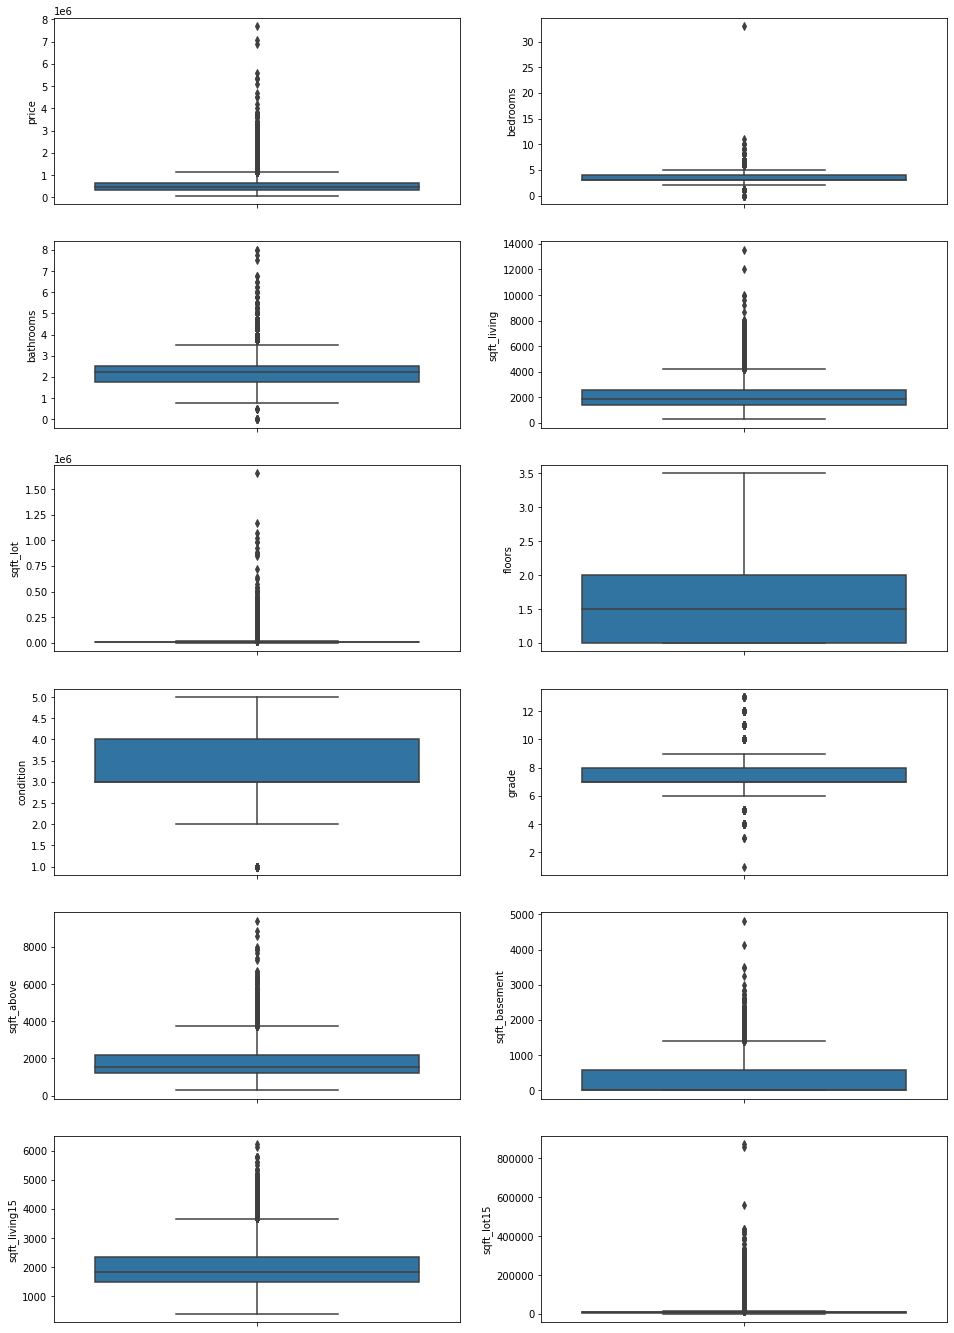

In [252]:
#Checking for outliers
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8),(ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2,figsize=(16,24))
sns.boxplot(y=data['price'], ax=ax1)
sns.boxplot(y=data['bedrooms'], ax=ax2)
sns.boxplot(y=data['bathrooms'], ax=ax3)
sns.boxplot(y=data['sqft_living'], ax=ax4)
sns.boxplot(y=data['sqft_lot'], ax=ax5)
sns.boxplot(y=data['floors'], ax=ax6)
sns.boxplot(y=data['condition'], ax=ax7)
sns.boxplot(y=data['grade'], ax=ax8)
sns.boxplot(y=data['sqft_above'], ax=ax9)
sns.boxplot(y=data['sqft_basement'], ax=ax10)
sns.boxplot(y=data['sqft_living15'], ax=ax11)
sns.boxplot(y=data['sqft_lot15'], ax=ax12)
    
plt.show()

In [253]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'auto'
# ---
# 
data_nout = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape datasets
print("Old data shape: ",data.shape)

print("New dataset shape: ",data_nout.shape)

# Number of rows removed

print("Rows of outliers removed: ",data.shape[0] - data_nout.shape[0])


Old data shape:  (21610, 20)
New dataset shape:  (14935, 20)
Rows of outliers removed:  6675


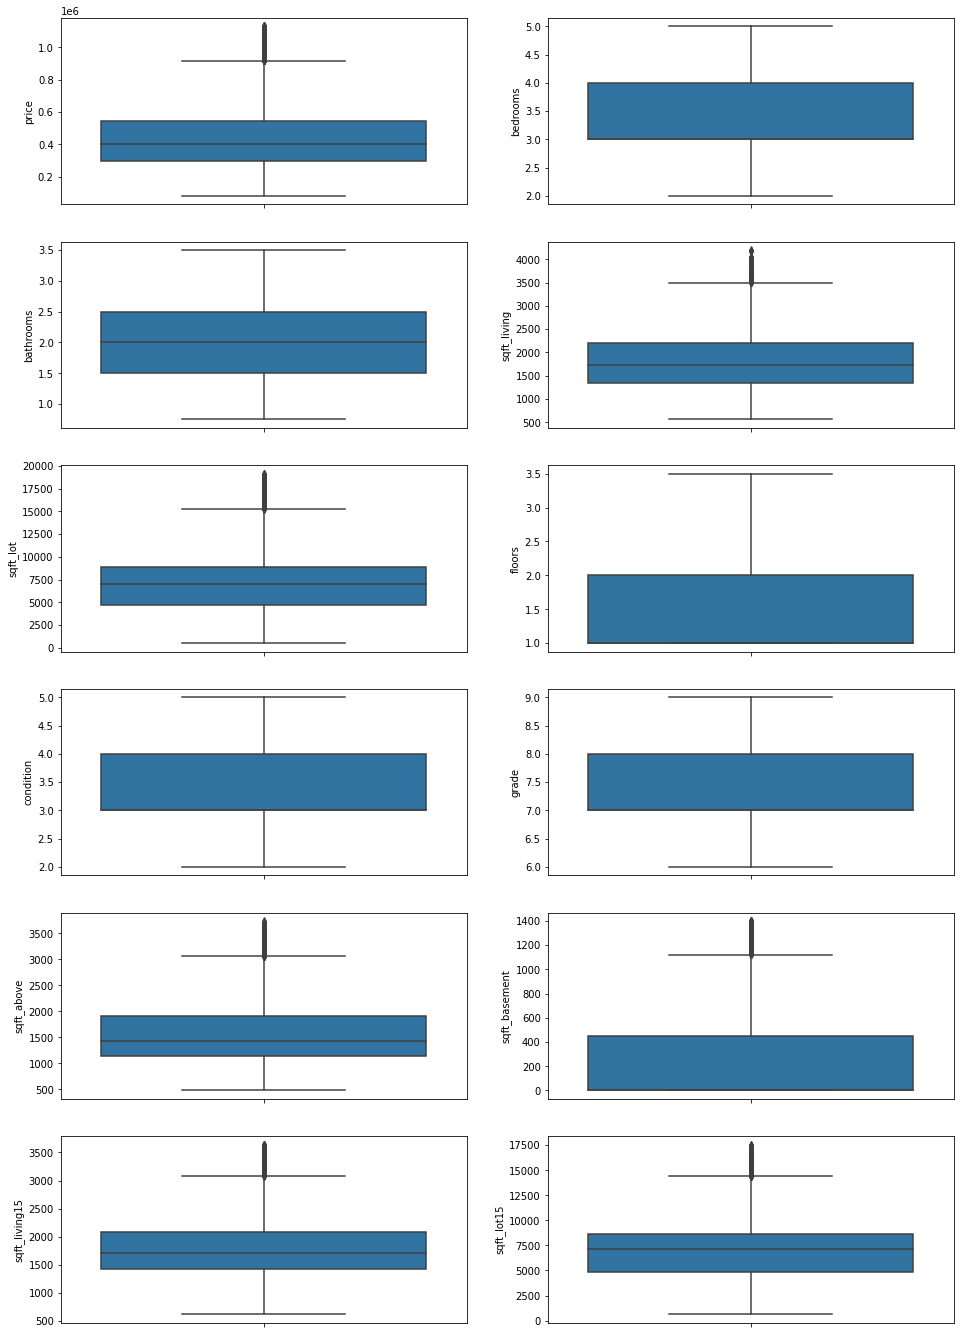

In [254]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8),(ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2,figsize=(16,24))
sns.boxplot(y=data_nout['price'], ax=ax1)
sns.boxplot(y=data_nout['bedrooms'], ax=ax2)
sns.boxplot(y=data_nout['bathrooms'], ax=ax3)
sns.boxplot(y=data_nout['sqft_living'], ax=ax4)
sns.boxplot(y=data_nout['sqft_lot'], ax=ax5)
sns.boxplot(y=data_nout['floors'], ax=ax6)
sns.boxplot(y=data_nout['condition'], ax=ax7)
sns.boxplot(y=data_nout['grade'], ax=ax8)
sns.boxplot(y=data_nout['sqft_above'], ax=ax9)
sns.boxplot(y=data_nout['sqft_basement'], ax=ax10)
sns.boxplot(y=data_nout['sqft_living15'], ax=ax11)
sns.boxplot(y=data_nout['sqft_lot15'], ax=ax12)
    
plt.show()

# Regression Models

## Multiple Linear Regression.

In [255]:
#Preparing the data
X = data_nout.drop(['price'],axis=1)
y = data_nout['price']

In [256]:
#Splitting Data into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [257]:
#Fiting the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [258]:
#Predictions
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5932,377500.0,259106.508232
2642,190000.0,153693.619752
19773,399000.0,418566.191596
20532,550000.0,232316.671515
15458,208000.0,147464.291046
...,...,...
10777,630000.0,535412.346067
2094,248000.0,299511.752136
14814,545000.0,539422.001304
16271,341000.0,398708.906606


In [259]:
#R2 Score
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.6479341949456594
MSE: 11340881063.399134


### Linear regression scores to compare with other regression methods
1. R2 score: 0.6479341949456594
2. MSE: 11340881063.399134

## Barlett's Test


In [260]:

# Bartlett's test

import scipy as sp
residuals = y_pred - y_test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing critical value
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)



if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('Test Result is less than the Critical Value hence the variances are homogeneous')

Test Result is less than the Critical Value hence the variances are homogeneous


## Lasso Regression

In [261]:
#Lasso Object
from sklearn import linear_model
lasso = linear_model.Lasso(normalize=True)

In [262]:
#Fit the model and scores
lasso.fit(X, y) 


print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6544628475819029
lasso MSE: 11266189473.755194
lasso coef: [ 2.43211171e-07 -8.71249273e+03  1.56942471e+04  8.53699694e+01
 -2.63797324e+00  1.28609030e+04  0.00000000e+00  0.00000000e+00
  2.79184363e+04  7.73333777e+04  4.06035051e+00  0.00000000e+00
 -1.93257232e+03  0.00000000e+00 -2.55285508e+02  5.37946296e+05
 -9.15127254e+02  4.99008064e+01 -5.51764717e+00]


In [263]:
from sklearn.model_selection import GridSearchCV
#regularization parameter
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
# Initializing  lasso
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso(normalize=True,max_iter=20000) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 
# Fitting models 
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("Best Lasso Parameters are ::", gridlasso.best_params_) 
print("The lasso score is :", gridlasso.score(X_test, y_test))
print("The linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

Best Lasso Parameters are :: {'alpha': 2.5}
The lasso score is : 0.6479629396206148
The linear score: 0.6479341949456594
lasso MSE: 11339955128.715347
linear MSE: 11340881063.399134
lasso best estimator coef: [ 5.60457040e-07 -8.01247841e+03  1.75837343e+04  8.34225485e+01
 -2.68163171e+00  1.43902290e+04  0.00000000e+00  0.00000000e+00
  2.69814985e+04  7.75937687e+04  3.34944452e+00  0.00000000e+00
 -1.94943167e+03  0.00000000e+00 -2.44958975e+02  5.32355397e+05
 -0.00000000e+00  4.90094433e+01 -5.17941100e+00]
linear coef: [ 6.44957633e-07 -8.99661384e+03  1.84158998e+04  5.71315351e+01
 -2.75087002e+00  1.48405861e+04  2.71711542e-11  1.93267624e-11
  2.72662174e+04  7.76224461e+04  3.05374586e+01  2.65940764e+01
 -1.98076183e+03 -5.09317033e-11 -2.58206253e+02  5.33900512e+05
 -2.84725126e+03  4.93133674e+01 -5.18908901e+00]


## Ridge Regression

In [264]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("The MSE for this model is : ",first_model) 

The MSE for this model is :  11265882048.43807


In [265]:
#Import libraries for Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Creating ridge model
ridge = Ridge(normalize=True)
# Setting up grid to be used
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [266]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_




{'alpha': 0.01}

In [267]:
#fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=1e-05)
ridge.fit(X, y)
second_model = (mean_squared_error(y_true=y, y_pred=ridge.predict(X)))
print("The MSE for this model is : ",second_model)

The MSE for this model is :  11265882050.546537


In [268]:
# Getting coefficients
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': 2.835060675660127e-07,
 'bedrooms': -9159.361087973884,
 'bathrooms': 16083.816384414577,
 'sqft_living': 49.95334088329094,
 'sqft_lot': -2.6664853632794836,
 'floors': 13035.755794590512,
 'waterfront': 0.0,
 'view': 0.0,
 'condition': 28057.3776199566,
 'grade': 77309.055911439,
 'sqft_above': 39.92071525147647,
 'sqft_basement': 35.514499100586384,
 'yr_built': -1945.239059446716,
 'yr_renovated': 0.0,
 'zipcode': -262.25831387852276,
 'lat': 538720.4647242178,
 'long': -3361.1938126864097,
 'sqft_living15': 50.09257414726171,
 'sqft_lot15': -5.521337421680643}

## Elasic Net Regression


In [269]:
from sklearn.linear_model import ElasticNet

In [270]:

# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("The MSE for this model is : ",first_model) 

The MSE for this model is :  11265882048.43807


In [271]:
# coefficients of this first model.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': 2.834893584455535e-07,
 'bedrooms': -9159.805223285326,
 'bathrooms': 16084.309164687229,
 'sqft_living': 58.44740957064151,
 'sqft_lot': -2.66645114002218,
 'floors': 13035.837254023545,
 'waterfront': -1.3691874301002827e-09,
 'view': -3.7493208537853207e-10,
 'condition': 28057.219848181194,
 'grade': 77310.38380661565,
 'sqft_above': 31.426979390144734,
 'sqft_basement': 27.020430174265062,
 'yr_built': -1945.2900947144822,
 'yr_renovated': 4.3655745685100555e-11,
 'zipcode': -262.2685094345614,
 'lat': 538724.5573773129,
 'long': -3359.7642029613453,
 'sqft_living15': 50.09212499634555,
 'sqft_lot15': -5.521441116394271}

In [272]:
#Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [273]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [274]:
#setting alpha to 1e-05 and l1ratio to 0.8
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("The MSE for this model is ",second_model)

The MSE for this model is  11282603022.35343


In [275]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': 3.285361651283784e-07,
 'bedrooms': -7914.718718366093,
 'bathrooms': 14882.278718879046,
 'sqft_living': 49.49154623614601,
 'sqft_lot': -2.7380413134947172,
 'floors': 12823.187580302452,
 'waterfront': 0.0,
 'view': 0.0,
 'condition': 28382.512082347534,
 'grade': 73653.24163180243,
 'sqft_above': 39.32364305149993,
 'sqft_basement': 35.846808486614314,
 'yr_built': -1806.4437277958996,
 'yr_renovated': 0.0,
 'zipcode': -233.75309260979478,
 'lat': 526553.98548781,
 'long': -6969.256637846103,
 'sqft_living15': 51.1600969300154,
 'sqft_lot15': -5.245228719085161}

An MSE of 11282603022.35 is bigger than that for the linear regression. This means that  Elastic Net is doing worse than linear regression. 

## Quantile Regression

### Summarize Linear Regression to compare with Quantile Regression using statsmodel

In [276]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model=linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1884.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:38:41   Log-Likelihood:            -1.9403e+05
No. Observations:               14935   AIC:                         3.881e+05
Df Residuals:                   14919   BIC:                         3.882e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.081e+06   1.92e+06      1.602      0.109    -6.9e+05    6.85e+06
id             2.835e-07   3.07e-07      0.923      0.356   -3.18e-07    8.85e-07
bedrooms      -9159.8052   1475.777     -6.207      0.000   -1.21e+04   -6267.101
bathrooms      1.608e+04   2323.095      6.924      0.000    1.15e+04    2.06e+04
sqft_living      58.4473      1.868     31.286      0.000      54.786      62.109
sqft_lot         -2.6665      0.563     -4.737      0.000      -3.770      -1.563
floors         1.304e+04   2651.779      4.916      0.000    7838.025    1.82e+04
waterfront    -2.709e-06   1.69e-06     -1.601      0.109   -6.02e-06    6.07e-07
view          -2.059e-06   1.29e-06     -1.601      0.109   -4.58e-06    4.61e-07
condition      2.806e+04   1522.847     18.424      0.000    2.51e+04     3.1e+04
grade          7.731e+04   1652.990     46.770      0.000    7.41e+04    8.06e+04
sqft_above       31.4271      1.821     17.261      0.000      27.858      34.996
sqft_basement    27.0205      2.076     13.016      0.000      22.952      31.089
yr_built      -1945.2901     48.591    -40.034      0.000   -2040.534   -1850.046
yr_renovated     3.2e-08      2e-08      1.601      0.109   -7.18e-09    7.12e-08
zipcode        -262.2685     21.449    -12.228      0.000    -304.310    -220.227
lat            5.387e+05   6721.062     80.155      0.000    5.26e+05    5.52e+05
long          -3359.7642   9748.237     -0.345      0.730   -2.25e+04    1.57e+04
sqft_living15    50.0921      2.814     17.801      0.000      44.576      55.608
sqft_lot15       -5.5214      0.635     -8.691      0.000      -6.767      -4.276
==============================================================================
Omnibus:                     1899.320   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4113.821
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                       5.052   Cond. No.                     4.43e+26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Quantile Regression

In [277]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []
#
mod = smf.quantreg('price ~ sqft_living', data)
# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params_df = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params_df)

    qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1  42836.363542  123.636364      121.910844      125.361883
1  0.2  34093.556945  151.809356      149.768675      153.850036
2  0.3  28294.573645  178.682171      175.967595      181.396747
3  0.4  33434.083832  201.463473      198.244432      204.682515
4  0.5  52696.035243  216.740088      213.230524      220.249652
5  0.6  72811.447813  230.639731      227.224993      234.054469
6  0.7  84736.301369  251.027397      246.984937      255.069857
7  0.8  86602.871214  287.081339      281.563940      292.598739
8  0.9  54209.999914  371.000000      362.604339      379.395661


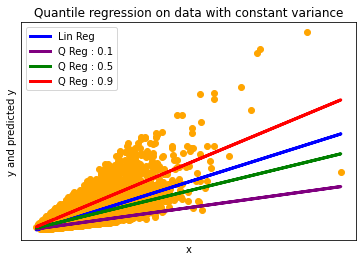

In [284]:
## Plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 

x_axis = data['sqft_living'].values.reshape(-1,1)
y_axis = data['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_axis, y_axis)

y_pred2 = model2.predict(x_axis)

# Plotting the 0.1th, 0.5th and 0.9th quantile models against the original data.

plt.figure(5)
plt.scatter(x_axis, y_axis,  color='orange')
plt.plot(x_axis, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['sqft_living'] * x_axis
plt.plot(x_axis, y_pred3, color='purple',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['sqft_living'] * x_axis
plt.plot(x_axis, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['sqft_living'] * x_axis
plt.plot(x_axis, y_pred5, color='red',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with constant variance")
plt.legend()

<Figure size 432x288 with 0 Axes>

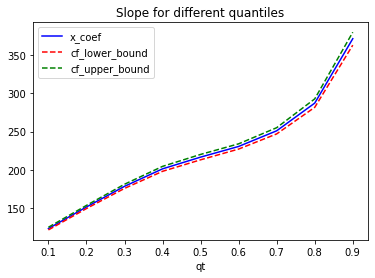

In [279]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params_df.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
    title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

### Compare same data with Linear Regression on 'sqft_living' Vs 'price' summary

In [280]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model=linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:38:45   Log-Likelihood:            -3.0024e+05
No. Observations:               21610   AIC:                         6.005e+05
Df Residuals:                   21608   BIC:                         6.005e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.387e+04   4405.781     -9.957      0.000   -5.25e+04   -3.52e+04
x1           280.8088      1.938    144.915      0.000     277.011     284.607
==============================================================================
Omnibus:                    14812.475   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543289.317
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.907   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclussion
1. linear : MSE: 11340881063.399134
2. lasso MSE: 11266189473.755194
3. Ridge MSE :  11265882050.546537
4. ElasticNet MSE:  11265882048.43807

ElasticNet model performed better followed by the Ridge model. 

# Recommendation
I recommend Hass Consult to use ElasticNet and Ridge model.